Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

################### Sklearn ####################################
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Configure Pandas and Seaborn Settings

In [2]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

Import Dataset

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 5110


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Remove ID column

In [4]:
data.drop(columns='id', inplace=True) # Remove Patients ID since it is not useful for prediction
data.info() #print column data and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Check for missing value

In [5]:
data.isna().sum() # Check for missing data (NaN or No data)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Drop columns with missing values
data.dropna(how='any', inplace=True)

In [7]:
cols = data.columns[:-1] # retrieve all columns except the target variable (last column = stroke)
print("cols: ", cols)
print("data: ", data)

cols:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
data:        gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
5       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
5104  Female  13.0             0              0           No       children   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    M

Split data into numeric and categorical

In [8]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

Visualize Numerical Features

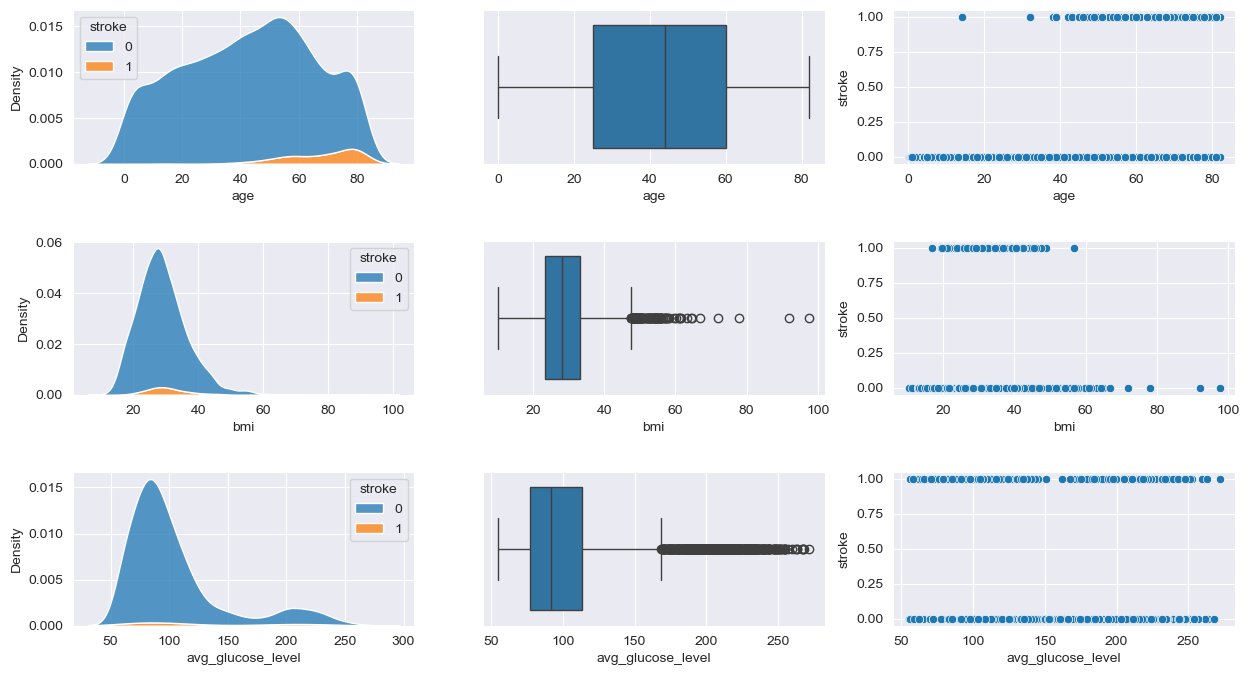

In [9]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(hspace = 0.5)
for num_col in numeric_columns :
    sns.kdeplot(x=num_col, hue='stroke', data=data, multiple='stack', ax=ax[i,0]) # Kernel Density Plot
    sns.boxplot(x=num_col, data=data, ax=ax[i, 1]) # Box Plot
    sns.scatterplot(x=num_col, y='stroke', data=data, ax=ax[i, 2])  # Scatter Plot
    i+=1
plt.show()

Visualize Categorical Features

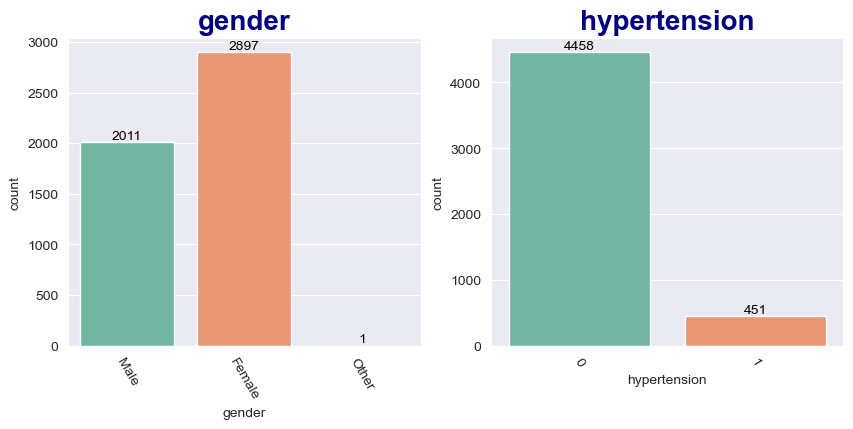

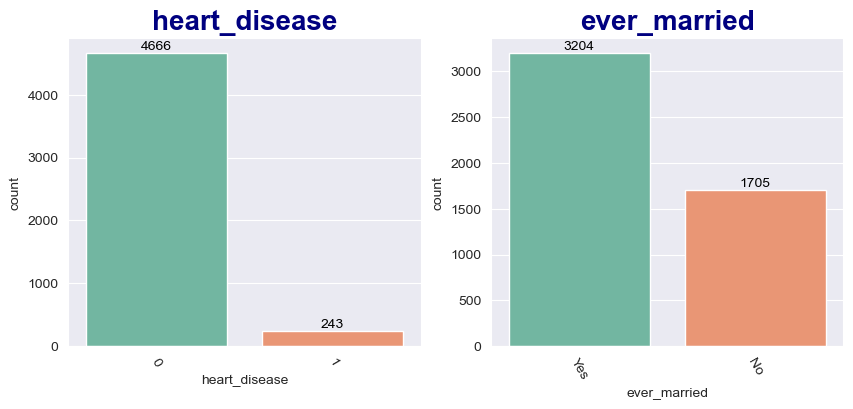

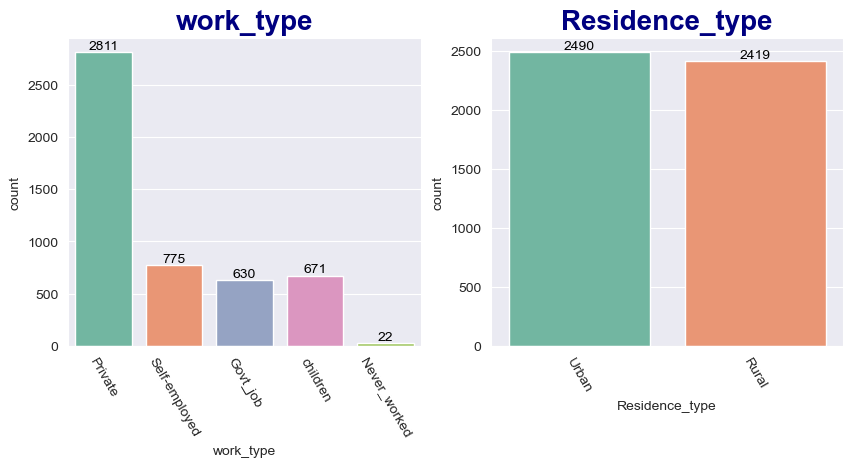

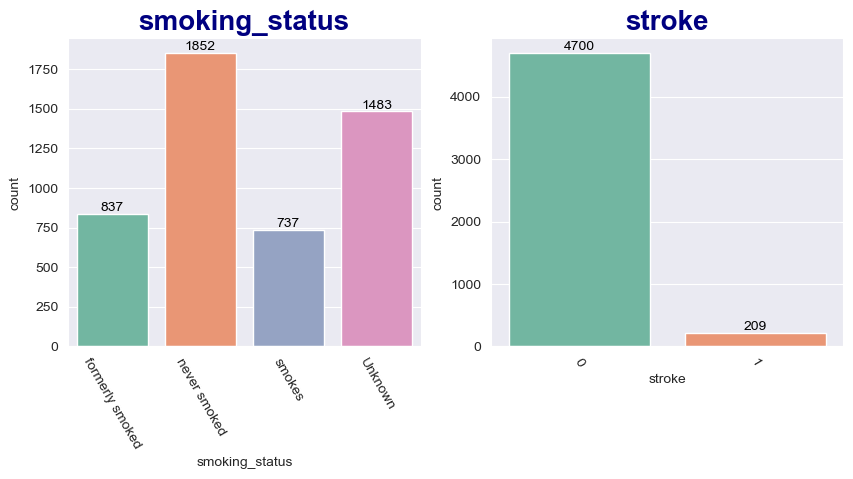

In [10]:
i=0
while i<8 :
    
    # Left AX
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data , palette="Set2")
    for container in ax.containers:
        ax.bar_label(container, color='black') 
    ax.tick_params(axis='x', rotation=300)
    i+=1
    
    # Right AX
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data , palette="Set2")
    for container in ax.containers:
        ax.bar_label(container, color='black') 
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()

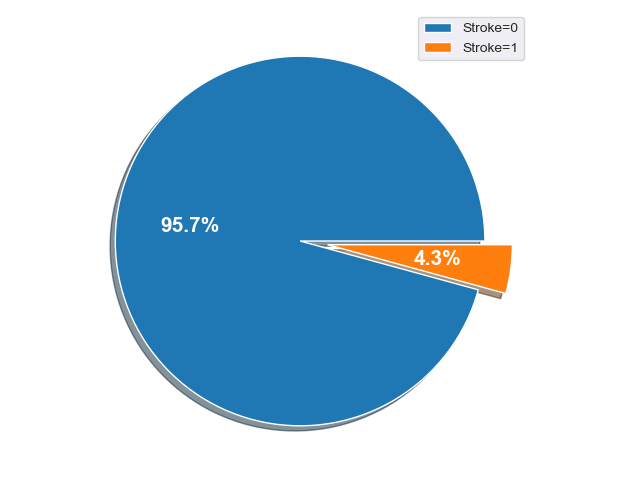

In [11]:
x = data['stroke'].value_counts()


explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

## Plot Analysis
Results :
1) About 96% of samples have not Stroke and 4% have stroke.
2) Distribution of samples is a Normal distribution.
3) Those who have had a stroke are in:
age in range 40 to 85
bmi in range 20 to 40
glocuse level in range 50 to 130
4) About 60% of samples are female.
5) About 91% of samples dont have any hypertension.
6) About 95% of samples dont have any heart disease.
7) About 34% of samples never get married.
8) Most of samples worked in private.
9) We dont have any information in smoking field for 1483 of sapmples.

Prepare Data for Encoding

In [12]:
columns_temp = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for col in columns_temp:
    print('column :', col)
    for index, unique in enumerate(data[col].unique()) :
        print(unique, ':', index)
    print('_'*45)

column : gender
Male : 0
Female : 1
Other : 2
_____________________________________________
column : ever_married
Yes : 0
No : 1
_____________________________________________
column : work_type
Private : 0
Self-employed : 1
Govt_job : 2
children : 3
Never_worked : 4
_____________________________________________
column : smoking_status
formerly smoked : 0
never smoked : 1
smokes : 2
Unknown : 3
_____________________________________________
column : Residence_type
Urban : 0
Rural : 1
_____________________________________________


Do Label Encoding on Categorical Column

In [13]:
# gender
data_2 = data.replace(
    {'gender' : {'Male' : 0, 'Female' : 1, 'Other' : 2}}
)

# ever_married
data_2 =  data_2.replace(
    {'ever_married' : {'Yes' : 0, 'No' : 1}}
)

# work_type
data_2 =  data_2.replace(
    {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
)

# smoking_status
data_2 =  data_2.replace(
    {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
)

# Residence_type
data_2 =  data_2.replace(
    {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
)

In [14]:
cleaned_data_path = "cleaned_healthcare_data.csv"
data_2.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")

Cleaned data saved to cleaned_healthcare_data.csv


In [15]:
data_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0,1
